In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [7]:
#Load data
df = pd.read_csv('diabetes_dataset.csv')

#Read first few lines
print(df.head())

   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5.0                  10

In [9]:
#Summary statistics
df.describe(include='all')

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,3,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,NaN,58552,NaN,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,2018.360820,NaN,41.885856,NaN,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,1.345239,NaN,22.516840,NaN,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,2015.000000,NaN,0.080000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,NaN,43.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,NaN,60.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


From above table we can see data is collected from year 2015 to 2022, between age 0.08 and 80, bmi between 10.01 and 95.69.

Questions:
1. What is the distribution of race?&Can a person have two different races?
2. Trend of diabetes YoY.
3. Relationship between diabetes and other factors(bmi,hypertension,heart disease,hbA1c level and bloood glucose level)?
4. Age distribution among different groups(diabetes/smoking)?
5. Location distribution of population.
6. Diabetes distribution in gender,age?

In [11]:
#Answer Q1
#First is to give each line a Patient ID
df["id"] = df.index
#Add values for all race columns
df["sum_race"] = df[["race:AfricanAmerican","race:Asian","race:Caucasian","race:Hispanic","race:Other"]].sum(axis=1)
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,id,sum_race
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,49999.500000,1.0
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,28867.657797,0.0
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,1.0
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,24999.750000,1.0
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,49999.500000,1.0
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,74999.250000,1.0
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,99999.000000,1.0


From race above summary statistics, a person can't have more than 1 race attibute. From mean of different race, we could see the value is around 0.2. Therefore, the race distribution does not align with population race distribution. Sample is not randomly collected from the population.

year  diabetes
2015  0            8001
      1             759
2016  0            7995
      1             765
2018  0            2435
      1             243
2019  0           73018
      1            6727
2020  0              39
      1               3
2021  0               6
      1               1
2022  0               6
      1               2
Name: diabetes, dtype: int64


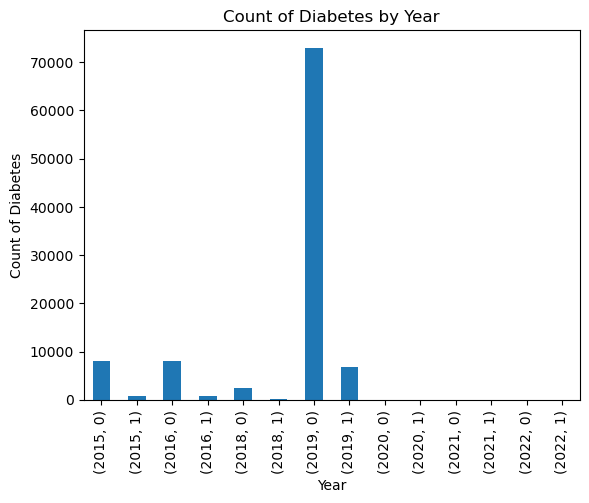

In [23]:
#Answer Q2
#Aggregate data then plot

aggregated_data = df.groupby(['year','diabetes'])['diabetes'].count() 
print(aggregated_data)

aggregated_data.plot(kind='bar')
plt.title('Count of Diabetes by Year')
plt.xlabel('Year')
plt.ylabel('Count of Diabetes')
plt.show()



We can see the diabete patients are not evenly spreaded across the years. We might need to take log transformation of results.

In [33]:
#Answer Q3
# Importing library
import pandas as pd
from scipy.stats import f_oneway

# Separate the data into groups based on the 'Group' column
groups = [df['bmi'][df['diabetes'] == group] for group in df['diabetes'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 4816.113932175362
P-value: 0.0


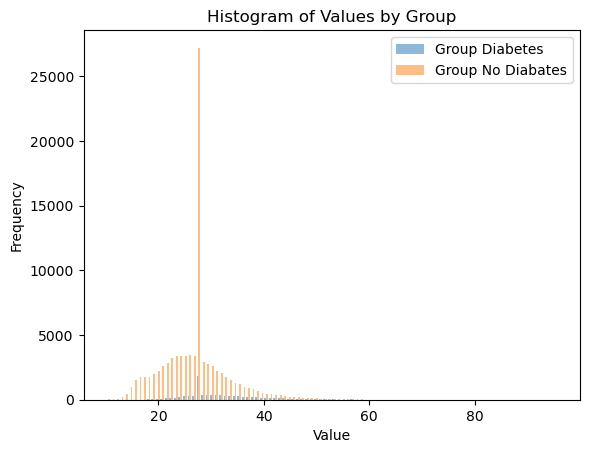

In [57]:

# Plot histograms
plt.hist([df[df['diabetes'] == 1]['bmi'], df[df['diabetes'] == 0]['bmi']], 
         bins=100, alpha=0.5, label=['Group Diabetes', 'Group No Diabates'])
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values by Group')
plt.show()

In [65]:

# Create bins by group
df['bin'] = df.groupby('diabetes')['bmi'].transform(lambda x: pd.cut(x, bins=50, labels=False))
# Filter dataframe based on bin
filtered_df = df[df['bin'] == 10]
filtered_df.describe()


From the histogram above, there was a spike in the plot which signaled there was an abnormal reading for bmi. We discovered that there were many bmi values of 27.32. We will need to find out how to deal with this.

In [ ]:
filtered_df